In [1]:
import cv2
import os


current_directory = os.getcwd()
save_dir = "pictures"
os.makedirs(save_dir, exist_ok=True)  




In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models


3.9.2


In [3]:
# 1. Load your image dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
    current_directory + "/assets/fsl_data",       # replace with your folder name
    validation_split=0.2,          # 20% for validation
    subset="training",
    seed=123,
    image_size=(224, 224),         # resize images
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    current_directory + "/assets/fsl_data",
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(224, 224),
    batch_size=32
)


class_names = train_ds.class_names
num_classes = len(class_names)
print(f"Class names: {class_names}")



AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)




Found 11700 files belonging to 26 classes.
Using 9360 files for training.
Found 11700 files belonging to 26 classes.
Using 2340 files for validation.
Class names: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


CNN NETWORK

In [4]:
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

model = tf.keras.Sequential([
    # Input layer
    tf.keras.layers.Rescaling(1./255, input_shape=(224, 224, 3)),  # Normalize the image pixel values
    
    # CNN layers
    tf.keras.layers.Conv2D(32, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    
    # Flatten the output to feed into fully connected layers
    tf.keras.layers.Flatten(),
    
    # Dense (Fully Connected) layers
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes, activation='softmax')  # Output layer (one per class)
])

# 4. Compile the model
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',  # Use sparse categorical crossentropy for integer labels
    metrics=['accuracy']
)

# 5. Train the model
model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10  # You can increase this based on your needs
)

model.summary()

Epoch 1/10


c:\Users\Migs\Desktop\deep\myenv\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


293/293 ━━━━━━━━━━━━━━━━━━━━ 179s 604ms/step - accuracy: 0.3517 - loss: 2.3666 - val_accuracy: 0.9090 - val_loss: 0.3142
Epoch 2/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 158s 540ms/step - accuracy: 0.9453 - loss: 0.1938 - val_accuracy: 0.9171 - val_loss: 0.3229
Epoch 3/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 157s 534ms/step - accuracy: 0.9794 - loss: 0.0840 - val_accuracy: 0.9650 - val_loss: 0.1437
Epoch 4/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 156s 533ms/step - accuracy: 0.9858 - loss: 0.0562 - val_accuracy: 0.9637 - val_loss: 0.1630
Epoch 5/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 167s 570ms/step - accuracy: 0.9928 - loss: 0.0358 - val_accuracy: 0.9124 - val_loss: 0.4094
Epoch 6/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 152s 519ms/step - accuracy: 0.9764 - loss: 0.0916 - val_accuracy: 0.9731 - val_loss: 0.1243
Epoch 7/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 186s 636ms/step - accuracy: 0.9929 - loss: 0.0282 - val_accuracy: 0.9761 - val_loss: 0.1309
Epoch 8/10
293/293 ━━━━━━━━━━━━━━━━━━━━ 157s 534ms/step - accuracy: 0.9927 - loss: 0.02

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 86528)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    11,075,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 26)             │         3,354 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,516,944 (127.86 MB)

 Trainable params: 11,172,314 (42.62 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,344,630 (85.24 MB)

In [9]:
model.save('sign_language_model_CNN.keras')  # Save the model

In [10]:
model = tf.keras.models.load_model("sign_language_model_CNN.keras")

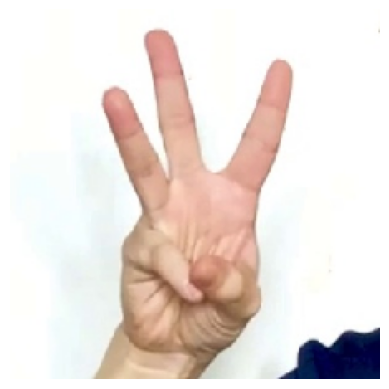

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
Predicted letter: W with 100.00% confidence


In [14]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the image
img_path = current_directory + "/pictures/W184.jpg"  # Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))  # Resize to match training size

# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axes for a cleaner view
plt.show()

# Preprocess the image for prediction
img_array = image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)  # Add batch dimension

# Make prediction
predictions = model.predict(img_array)
predicted_class = class_names[np.argmax(predictions[0])]
confidence = np.max(predictions[0]) * 100

# Display the prediction result
print(f"Predicted letter: {predicted_class} with {confidence:.2f}% confidence")